In [2]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

1558
830.0000000000001


<IPython.core.display.Javascript object>


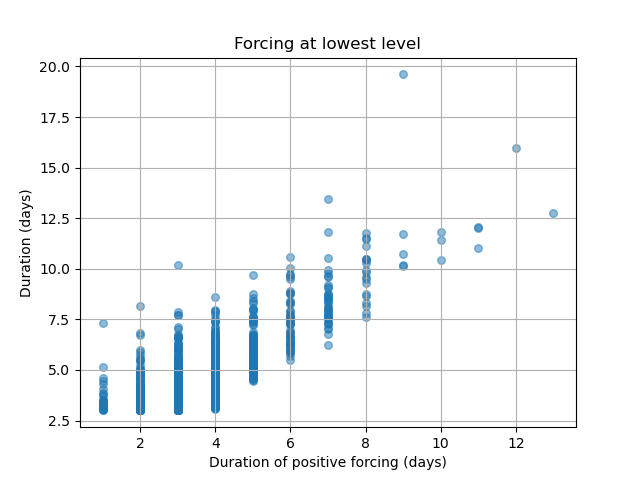

(0.8085354507149334, 0.0)


Text(0.5, 1.0, 'Forcing at lowest level')

In [2]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[7])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
test=[]

for i in range(len(convfh)):
    
    ah=convfh[i][:,:1].sum(axis=1)
    av=convfv[i][:,:1].sum(axis=1)
    a=np.array(ah)+np.array(av)

    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    test.append(len(a[np.where(a>0)]))
#     test.append(np.max(a))
        
plt.scatter(test, dur_list,s=30,alpha=0.5)
print(scipy.stats.pearsonr(dur_list, test))
plt.grid()
plt.ylabel('Duration (days)')
plt.xlabel('Duration of positive forcing (days)')
plt.title('Forcing at lowest level')

1558


<IPython.core.display.Javascript object>


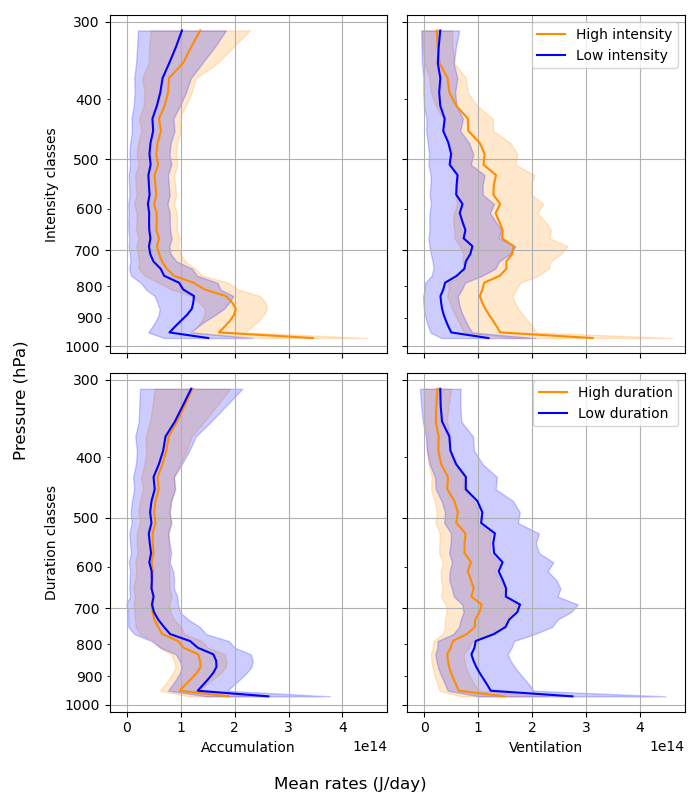

290.00000000000006


In [5]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
print(len(convf))
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 8)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=convf[i][:,:34]/2000+convv[i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='darkorange')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='darkorange', label='High intensity')

plt.yscale('log')
# plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0][0].grid(); ax[0][1].grid()

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='blue')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='blue', label='Low intensity')

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[0][1].legend()


##################################################################################
##################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='darkorange')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='darkorange', label='High duration')

plt.yscale('log')
plt.yticks([1000,700,500,300])
ax[1][0].grid(); ax[1][1].grid()

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='blue')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='blue', label='Low duration')

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1][1].legend()
mticker = matplotlib.ticker.ScalarFormatter()
ax[0][0].yaxis.set_minor_formatter(mticker)
ax[0][0].yaxis.set_major_formatter(mticker)

ax[0][0].set_ylabel('Intensity classes')
ax[1][0].set_ylabel('Duration classes')
ax[1][0].set_xlabel('Accumulation')
ax[1][1].set_xlabel('Ventilation')

fig.supxlabel('Mean rates (J/day)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('Vertical profiles')
plt.tight_layout()

plt.savefig('/home/data/lab_abel/Paper1_plots/vertical1.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


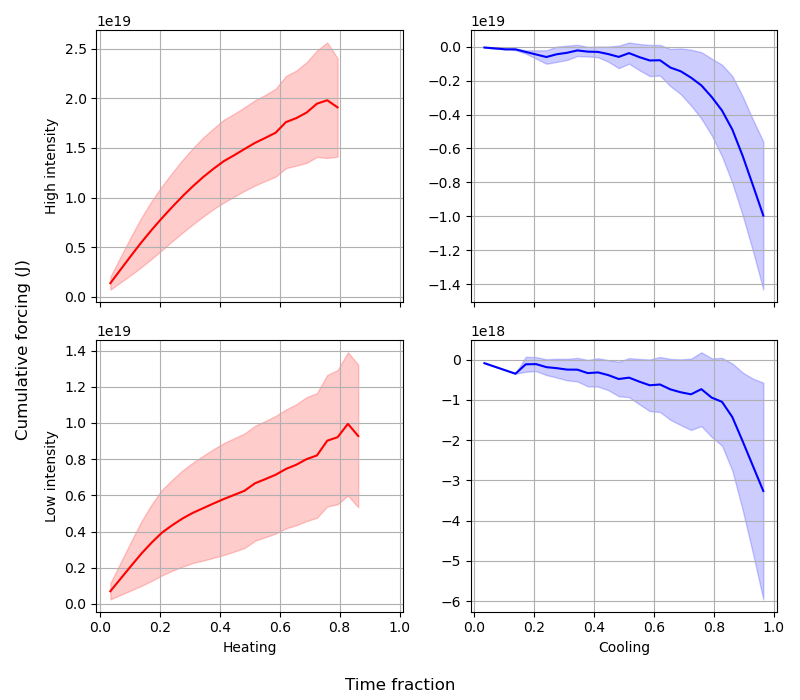

290.00000000000006


In [3]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
fig, ax = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(8, 7)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
heat_list=[]
cool_list=[]

for i in range(len(convf)):
    a=convf[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
    comp=np.zeros(len(a))
    src=np.insert((np.maximum(a,comp)).cumsum(),0,0)
    snk=np.insert((np.minimum(a,comp)).cumsum(),0,0)
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    heat_list.append(src)
    cool_list.append(snk)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.linspace(0,1,len(heat_list[i]))[:heat_end])
        yy.append(heat_list[i][:heat_end])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr[:-3],mean_arr[:-3], color='red')
ax[0][0].fill_between(x_arr[:-3], (mean_arr-std_arr)[:-3],(mean_arr+std_arr)[:-3], alpha=0.2,color='red')
ax[0][0].grid()
ax[0][0].set_ylabel('High intensity')

##############################################################################

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.linspace(0,1,len(heat_list[i]))[cool_end:])
        yy.append(cool_list[i][cool_end:])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr[:],mean_arr[:], color='blue')
ax[0][1].fill_between(x_arr[:], (mean_arr-std_arr)[:],(mean_arr+std_arr)[:], alpha=0.2,color='blue')
ax[0][1].grid()

###############################################################
###############################################################

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.linspace(0,1,len(heat_list[i]))[:heat_end])
        yy.append(heat_list[i][:heat_end])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr[:-3],mean_arr[:-3], color='red')
ax[1][0].fill_between(x_arr[:-3], (mean_arr-std_arr)[:-3],(mean_arr+std_arr)[:-3], alpha=0.2,color='red')
ax[1][0].grid()
ax[1][0].set_ylabel('Low intensity')
ax[1][0].set_xlabel('Heating')

##############################################################################

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.linspace(0,1,len(heat_list[i]))[cool_end:])
        yy.append(cool_list[i][cool_end:])

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr[:],mean_arr[:], color='blue')
ax[1][1].fill_between(x_arr[:], (mean_arr-std_arr)[:],(mean_arr+std_arr)[:], alpha=0.2,color='blue')
ax[1][1].grid()
ax[1][1].set_xlabel('Cooling')


fig.supxlabel('Time fraction')
fig.supylabel('Cumulative forcing (J)')

plt.tight_layout()
plt.savefig('/home/data/lab_abel/Paper1_var1/lifetime_int1.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


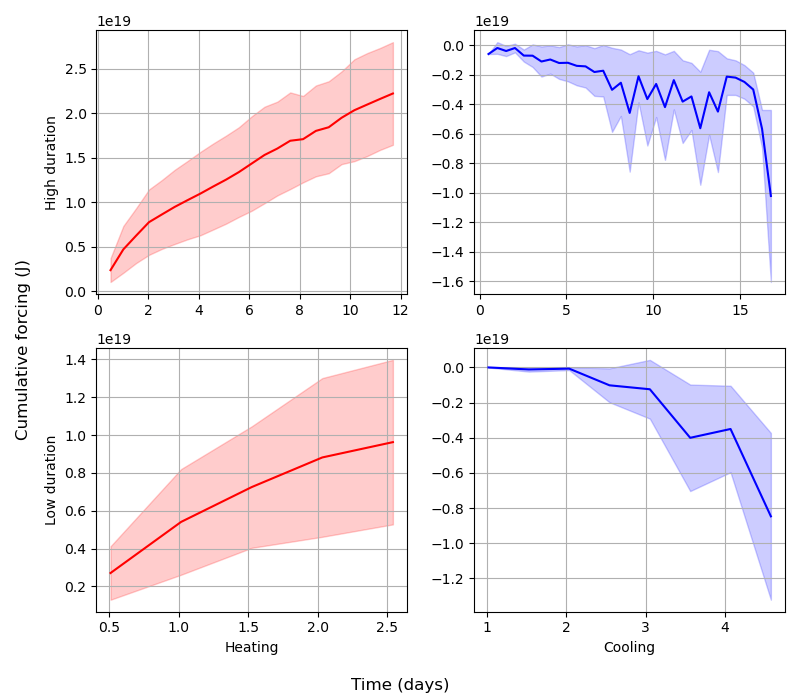

290.00000000000006


In [4]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8, 7)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
heat_list=[]
cool_list=[]

for i in range(len(convf)):
    a=convf[i][:,:7].sum(axis=1)+convv[i][:,:7].sum(axis=1)
    comp=np.zeros(len(a))
    src=np.insert((np.maximum(a,comp)).cumsum(),0,0)
    snk=np.insert((np.minimum(a,comp)).cumsum(),0,0)
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    heat_list.append(src)
    cool_list.append(snk)

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.arange(0,len(heat_list[i]))[:heat_end])
        yy.append(heat_list[i][:heat_end])

xx_arr=np.linspace(0,30,60)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr[:-14],mean_arr[:-14], color='red')
ax[0][0].fill_between(x_arr[:-14], (mean_arr-std_arr)[:-14],(mean_arr+std_arr)[:-14], alpha=0.2,color='red')
ax[0][0].grid()
ax[0][0].set_ylabel('High duration')

#########################################################

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.arange(0,len(heat_list[i]))[cool_end:])
        yy.append(cool_list[i][cool_end:])

xx_arr=np.linspace(0,30,60)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr[:-8],mean_arr[:-8], color='blue')
ax[0][1].fill_between(x_arr[:-8], (mean_arr-std_arr)[:-8],(mean_arr+std_arr)[:-8], alpha=0.2,color='blue')
ax[0][1].grid()


#############################################################
#############################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.arange(0,len(heat_list[i]))[:heat_end])
        yy.append(heat_list[i][:heat_end])

xx_arr=np.linspace(0,30,60)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr[:-2],mean_arr[:-2], color='red')
ax[1][0].fill_between(x_arr[:-2], (mean_arr-std_arr)[:-2],(mean_arr+std_arr)[:-2], alpha=0.2,color='red')
ax[1][0].grid()
ax[1][0].set_ylabel('Low duration')
ax[1][0].set_xlabel('Heating')

#########################################################

xx=[]
yy=[]
for i in range(len(heat_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        heat_end=(np.where(heat_list[i]==heat_list[i][-1]))[0][0]+1
        cool_end=(np.where(cool_list[i]==heat_list[i][0]))[0][-1]
        
        xx.append(np.arange(0,len(heat_list[i]))[cool_end:])
        yy.append(cool_list[i][cool_end:])

xx_arr=np.linspace(0,30,60)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr[:],mean_arr[:], color='blue')
ax[1][1].fill_between(x_arr[:], (mean_arr-std_arr)[:],(mean_arr+std_arr)[:], alpha=0.2,color='blue')
ax[1][1].grid()
ax[1][1].set_xlabel('Cooling')


fig.supxlabel('Time (days)')
fig.supylabel('Cumulative forcing (J)')

plt.tight_layout()
plt.savefig('/home/data/lab_abel/Paper1_var1/lifetime_dur1.pdf', bbox_inches='tight')

1558


<IPython.core.display.Javascript object>


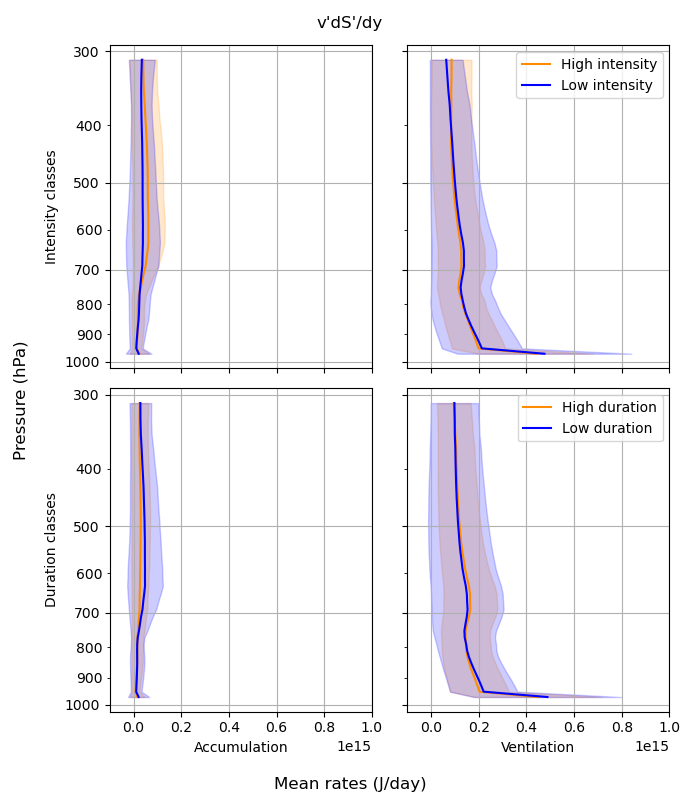

290.00000000000006


In [12]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
    
print(len(convf))
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 8)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=Rey[3][i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='darkorange')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='darkorange', label='High intensity')

plt.yscale('log')
# plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0][0].grid(); ax[0][1].grid()

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='blue')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='blue', label='Low intensity')

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[0][1].legend()


##################################################################################
##################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='darkorange')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='darkorange', label='High duration')

plt.yscale('log')
plt.yticks([1000,700,500,300])
ax[1][0].grid(); ax[1][1].grid()

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='blue')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='blue', label='Low duration')

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1][1].legend()
mticker = matplotlib.ticker.ScalarFormatter()
ax[0][0].yaxis.set_minor_formatter(mticker)
ax[0][0].yaxis.set_major_formatter(mticker)


ax[0][0].set_ylabel('Intensity classes')
ax[1][0].set_ylabel('Duration classes')
ax[1][0].set_xlabel('Accumulation')
ax[1][1].set_xlabel('Ventilation')
ax[1][1].set_xlim([-1e14, 1e15])

fig.supxlabel('Mean rates (J/day)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle('v'+'\''+'dS\'/dy')
plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1/vertical.pdf', bbox_inches='tight')
plt.savefig('/home/data/lab_abel/Paper1_plots/verticald.pdf', bbox_inches='tight')

1558


<IPython.core.display.Javascript object>


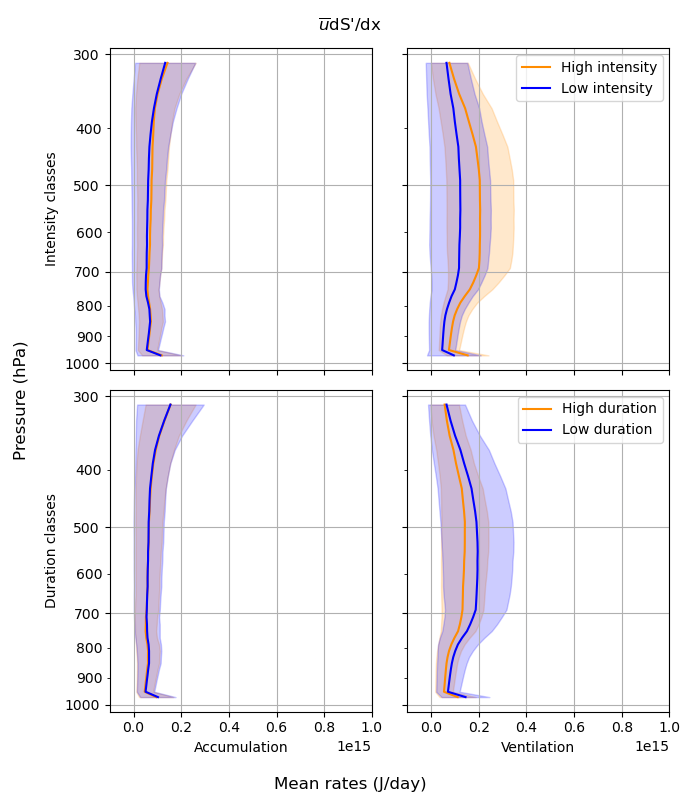

290.00000000000006


In [13]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
    
print(len(convf))
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 8)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=Rey[2][i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='darkorange')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='darkorange', label='High intensity')

plt.yscale('log')
# plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0][0].grid(); ax[0][1].grid()

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='blue')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='blue', label='Low intensity')

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[0][1].legend()


##################################################################################
##################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='darkorange')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='darkorange', label='High duration')

plt.yscale('log')
plt.yticks([1000,700,500,300])
ax[1][0].grid(); ax[1][1].grid()

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='blue')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='blue', label='Low duration')

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1][1].legend()
mticker = matplotlib.ticker.ScalarFormatter()
ax[0][0].yaxis.set_minor_formatter(mticker)
ax[0][0].yaxis.set_major_formatter(mticker)


ax[0][0].set_ylabel('Intensity classes')
ax[1][0].set_ylabel('Duration classes')
ax[1][0].set_xlabel('Accumulation')
ax[1][1].set_xlabel('Ventilation')
ax[1][1].set_xlim([-1e14, 1e15])

fig.supxlabel('Mean rates (J/day)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle(r'$\overline{u}$'+'dS\'/dx')
plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1/vertical.pdf', bbox_inches='tight')
plt.savefig('/home/data/lab_abel/Paper1_plots/verticalc.pdf', bbox_inches='tight')

1558


<IPython.core.display.Javascript object>


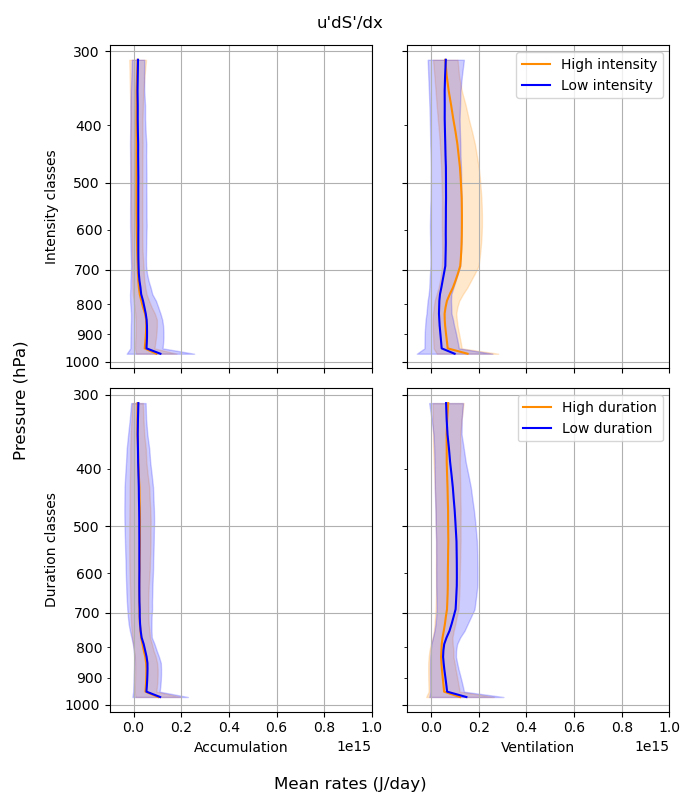

290.00000000000006


In [14]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
    
print(len(convf))
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 8)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=Rey[1][i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='darkorange')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='darkorange', label='High intensity')

plt.yscale('log')
# plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0][0].grid(); ax[0][1].grid()

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='blue')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='blue', label='Low intensity')

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[0][1].legend()


##################################################################################
##################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='darkorange')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='darkorange', label='High duration')

plt.yscale('log')
plt.yticks([1000,700,500,300])
ax[1][0].grid(); ax[1][1].grid()

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='blue')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='blue', label='Low duration')

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1][1].legend()
mticker = matplotlib.ticker.ScalarFormatter()
ax[0][0].yaxis.set_minor_formatter(mticker)
ax[0][0].yaxis.set_major_formatter(mticker)


ax[0][0].set_ylabel('Intensity classes')
ax[1][0].set_ylabel('Duration classes')
ax[1][0].set_xlabel('Accumulation')
ax[1][1].set_xlabel('Ventilation')
ax[1][1].set_xlim([-1e14, 1e15])

fig.supxlabel('Mean rates (J/day)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle('u'+'\''+'dS\'/dx')
plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1/vertical.pdf', bbox_inches='tight')
plt.savefig('/home/data/lab_abel/Paper1_plots/verticalb.pdf', bbox_inches='tight')

1558


<IPython.core.display.Javascript object>


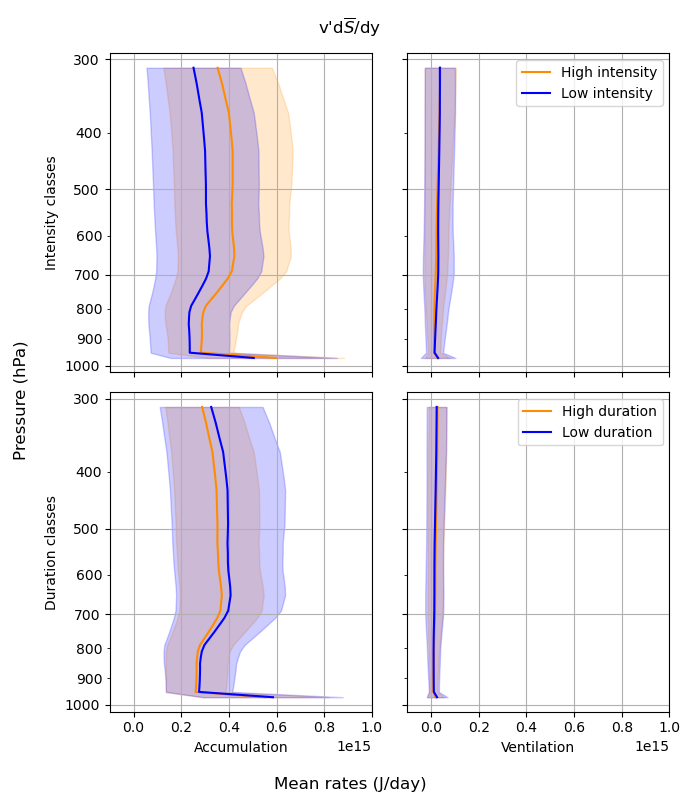

290.00000000000006


In [15]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate
import matplotlib

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convf,convv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
    
print(len(convf))
    
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 8)

# p_std = np.arange(0.5, 9.6 ,0.5)[::-1]*10000
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*100
print(p_std[34])
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

int_list=[]
dur_list=[]
a_list=[]

for i in range(len(convf)):
    a_full=Rey[0][i][:,:34]/2000
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    a_list.append(a_full)

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='darkorange')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='darkorange', label='High intensity')

plt.yscale('log')
# plt.yticks([1000,600,400,300])
plt.gca().invert_yaxis()
ax[0][0].grid(); ax[0][1].grid()

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[0][0].plot(mean, p_std[:34], color='blue')

ax[0][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[0][1].plot(mean, p_std[:34], color='blue', label='Low intensity')

ax[0][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[0][1].legend()


##################################################################################
##################################################################################

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

dur_sel=[]
int_sel=[]
a_sel=[]

for i in range(len(a_list)):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(a_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='darkorange')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='darkorange', label='High duration')

plt.yscale('log')
plt.yticks([1000,700,500,300])
ax[1][0].grid(); ax[1][1].grid()

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='darkorange')

#############################################################
dur_sel=[]
int_sel=[]
a_sel=[]
for i in range(len(a_list)):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        dur_sel.append(dur_list[i])
        int_sel.append(int_list[i])
        a_sel.append(a_list[i])


collp=[]
colln=[]
for i in range(len(dur_sel)):
    
    pos=np.maximum(a_sel[i],np.zeros(np.shape(a_sel[i])))
    neg=np.maximum(-a_sel[i],np.zeros(np.shape(a_sel[i])))
    collp.append(np.transpose(pos).mean(axis=1))
    colln.append(np.transpose(neg).mean(axis=1))

# print(np.shape(coll))
mean=np.mean(collp,axis=0)
std=np.std(collp,axis=0)
ax[1][0].plot(mean, p_std[:34], color='blue')

ax[1][0].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

mean=np.mean(colln,axis=0)
std=np.std(colln,axis=0)
ax[1][1].plot(mean, p_std[:34], color='blue', label='Low duration')

ax[1][1].fill_betweenx(p_std[:34],mean-std, mean+std, alpha=0.2, color='blue')

ax[1][1].legend()
mticker = matplotlib.ticker.ScalarFormatter()
ax[0][0].yaxis.set_minor_formatter(mticker)
ax[0][0].yaxis.set_major_formatter(mticker)


ax[0][0].set_ylabel('Intensity classes')
ax[1][0].set_ylabel('Duration classes')
ax[1][0].set_xlabel('Accumulation')
ax[1][1].set_xlabel('Ventilation')
ax[1][1].set_xlim([-1e14, 1e15])

fig.supxlabel('Mean rates (J/day)')
fig.supylabel('Pressure (hPa)')
# plt.suptitle('uwind_mean.d/dx(DSE_anom)')
fig.suptitle('v'+'\''+r'd$\overline{S}$/dy')
plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1/vertical.pdf', bbox_inches='tight')
plt.savefig('/home/data/lab_abel/Paper1_plots/verticala.pdf', bbox_inches='tight')